Group members: Joshua Dirga (jd2262), David Chen (dc855), Ashlie Zhang (az468)

Research Question:

Based on this data, which factors can be used to predict whether or not listening to music will improve a given individual’s mental health?

Dataset:
https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

In [14]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import seaborn as sns

In [13]:
# Read data
csv_filename = "mxmh_survey_results.csv"
raw_data = pd.read_csv(csv_filename).dropna()
raw_data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [3]:
# Get only integer values for now
only_integer_data = raw_data.select_dtypes(include='number')

In [4]:
# Correlation Matrix
corr = only_integer_data.corr()
corr

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.044917,-0.030435,-0.193781,-0.087390,0.007083,-0.140464
Hours per day,-0.044917,1.000000,0.043320,0.036945,0.085559,0.119036,0.108197
BPM,-0.030435,0.043320,1.000000,-0.027564,0.041804,0.054452,0.018939
Anxiety,-0.193781,0.036945,-0.027564,1.000000,0.527950,0.275013,0.339262
Depression,-0.087390,0.085559,0.041804,0.527950,1.000000,0.372675,0.158990
Insomnia,0.007083,0.119036,0.054452,0.275013,0.372675,1.000000,0.198866
OCD,-0.140464,0.108197,0.018939,0.339262,0.158990,0.198866,1.000000


In [5]:
# Convert string columns into integers
integer_data = raw_data.copy()
integer_data = integer_data.drop("Permissions", axis=1)
integer_data = integer_data.replace(["Yes"], 1.0)
integer_data = integer_data.replace(["No"], 0.0)
integer_data = integer_data.replace(["No effect"], 0.0)
integer_data = integer_data.replace(["Improve"], 1.0)
integer_data = integer_data.replace(["Worsen"], -1.0)

integer_data = integer_data.replace(["Never"], -2.0)
integer_data = integer_data.replace(["Rarely"], -1.0)
integer_data = integer_data.replace(["Sometimes"], 1.0)
integer_data = integer_data.replace(["Very frequently"], 2.0)

print(integer_data.head())

            Timestamp   Age Primary streaming service  Hours per day  \
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   
5  8/27/2022 21:56:50  18.0                   Spotify            5.0   
6  8/27/2022 22:00:29  18.0             YouTube Music            3.0   

   While working  Instrumentalist  Composer         Fav genre  Exploratory  \
2            0.0              0.0       0.0  Video game music          0.0   
3            1.0              0.0       1.0              Jazz          1.0   
4            1.0              0.0       0.0               R&B          1.0   
5            1.0              1.0       1.0              Jazz          1.0   
6            1.0              1.0       0.0  Video game music          1.0   

   Foreign languages  ...  Frequency [Pop]  Frequency [R&B]  Frequency [Rap]  \
2                1

In [17]:
# Correlation Matrix after changing to integers
corr = integer_data.select_dtypes(include='number').corr()
print(corr)

                                   Age  Hours per day  While working  \
Age                           1.000000      -0.044917      -0.056722   
Hours per day                -0.044917       1.000000       0.284923   
While working                -0.056722       0.284923       1.000000   
Instrumentalist              -0.092986      -0.020598       0.085167   
Composer                     -0.020728       0.151102       0.053883   
Exploratory                  -0.176944       0.127432       0.174944   
Foreign languages            -0.115733       0.083713       0.121532   
BPM                          -0.030435       0.043320       0.020448   
Frequency [Classical]         0.102132      -0.031240       0.079333   
Frequency [Country]           0.128320       0.037744      -0.029889   
Frequency [EDM]              -0.076992       0.126162       0.149832   
Frequency [Folk]              0.134422       0.082749       0.018952   
Frequency [Gospel]            0.120655       0.026249       0.06

We can see that Music Effects has the highest correlation with the frequency a user listens to RnB. Before we use this information, let us first try multiple linear regression to see if there is a relationship between all the variables and our dependent variable "Music effects"

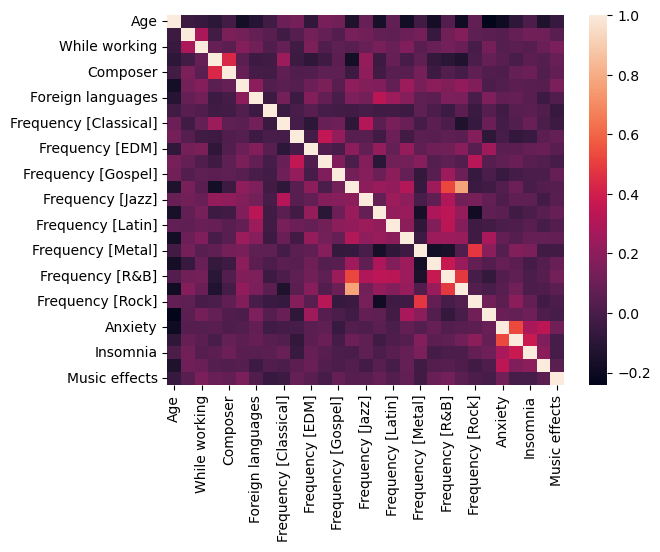

In [16]:
sns.heatmap(corr, annot=False) # Although it is called heatmap here, it nonetheless shows the pairwise correlation between features.
plt.show()

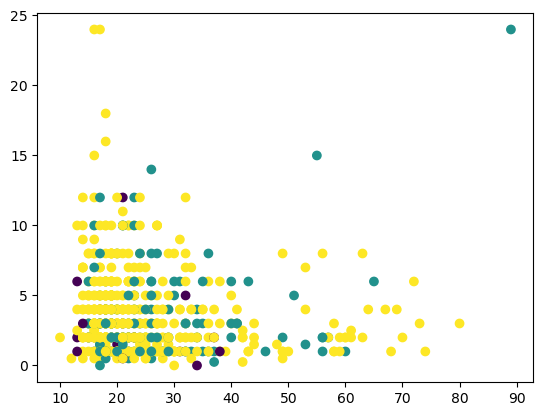

In [27]:
plt.scatter(integer_data["Age"], integer_data["Hours per day"], c=integer_data["Music effects"].values.ravel())
plt.show()

From the graph we can see that age and hours per day do not share a relationship with our dependent variable "Music effects". As the distribution of the music effects categorized by the different colors do not show any clear groupings, we will not be classifying based on these features alone.

In [7]:
# Multiple Linear Regression
exclude = ["Timestamp", "Music effects", "Primary streaming service", "Fav genre", "Permissions"]
X = integer_data[[x for x in integer_data if x not in exclude]]
Y = integer_data["Music effects"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(predictions, y_test)))

0.5331344385749347


Clearly, the multiple linear regression has a very poor mean squared error. Let us try another method.

In [8]:
# KNN classification
exclude = ["Timestamp", "Music effects", "Primary streaming service", "Fav genre", "Permissions"]
X = integer_data[[x for x in integer_data if x not in exclude]]
Y = integer_data["Music effects"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
highest_neighbors = 1
highest_value = 0
for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors=9)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test.values)
    acc = accuracy_score(predictions, y_test)
    if acc > highest_value:
        highest_neighbors = i
        highest_value = acc
print(highest_value)
print(highest_neighbors)

C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWa

C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7419354838709677
1


K-nearest-neighbors gives us a better accuracy, but it is not quite high enough. Next let us try decision trees.

In [9]:
# Decision trees
exclude = ["Timestamp", "Music effects", "Primary streaming service", "Fav genre", "Permissions"]
X = integer_data[[x for x in integer_data if x not in exclude]]
Y = integer_data["Music effects"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
model = tree.DecisionTreeClassifier(max_depth = 5)
highest_depth = 1
highest_value = 0
for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors=9)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test.values)
    acc = accuracy_score(predictions, y_test)
    if acc > highest_value:
        highest_depth = i
        highest_value = acc
print(highest_depth, highest_value)

C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWa

C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1 0.7419354838709677


Clearly, as we overfit our data, we get the same groupings which shows how KNN and decision trees both have the same accuracy when we overfit them. Next let us try

In [12]:
# KNN classification
X = integer_data[["Frequency [R&B]", "Anxiety"]]
Y = integer_data["Music effects"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
highest_neighbors = 1
highest_value = 0
for i in range(2,51):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test.values)
    acc = accuracy_score(predictions, y_test)
    if acc > highest_value:
        highest_neighbors = i
        highest_value = acc
print(highest_value)
print(highest_neighbors)

C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWa

0.75
11


C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWa

Conclusion:

We have some relationship between the features and our dependent variable, given a new set of user input, we could predict whether music would help them with their mental health with an accuracy of about 75%.

Evaluation:
When we used multiple linear regression, we found that our accuracy was near 50%, and thus we could not find a strong relationship. When we used other classifier models such as KNN and decision trees we found a stronger relationship however, we suspect we are overfitting the data because both KNN and Decision trees gave us a similar accuracy score. We also attempted to visualize the data in scatter plots, however most of the data is categorical which made it difficult to visualize in a scatter plot. Overall, we had some difficulties with our dataset because most of the data is categorical, however, we did find some relationships between the features and our dependent variable.